In [1]:
#check that all packages are up to date
import nltk 
nltk.download('all') 
sc.defaultParallelism

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package cess_cat is already up-

[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Pac

4

In [55]:
from pyspark.sql.types import *
import numpy as np
from time import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

file = "gs://ishitabucket/analyst_ratings_processed.csv"

schema = StructType([
    StructField("index", StringType(), True),    
    StructField("headline", StringType(), True),
    StructField("stock", StringType(), True),
    StructField("date", LongType(), True)
])

news_df = spark.read.csv(file, 
                    header='true', inferSchema='true', sep=',')

news_df.take(10)
    
    

[Row(_c0='0', title='Stocks That Hit 52-Week Highs On Friday', date='2020-06-05 10:30:00-04:00', stock='A'),
 Row(_c0='1', title='Stocks That Hit 52-Week Highs On Wednesday', date='2020-06-03 10:45:00-04:00', stock='A'),
 Row(_c0='2', title='71 Biggest Movers From Friday', date='2020-05-26 04:30:00-04:00', stock='A'),
 Row(_c0='3', title="46 Stocks Moving In Friday's Mid-Day Session", date='2020-05-22 12:45:00-04:00', stock='A'),
 Row(_c0='4', title='B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88', date='2020-05-22 11:38:00-04:00', stock='A'),
 Row(_c0='5', title='CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85', date='2020-05-22 11:23:00-04:00', stock='A'),
 Row(_c0='6', title='UBS Maintains Neutral on Agilent Technologies, Raises Price Target to $87', date='2020-05-22 09:36:00-04:00', stock='A'),
 Row(_c0='7', title='Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS an

In [8]:
google_df = news_df.filter("stock = 'GOOGL' ")

google_df.take(10)

[Row(_c0='569589', title='Facebook, Snap Analyst Projects Q2 Revenue Upside For Social Media Stocks', date='2020-06-10 15:25:00-04:00', stock='GOOGL'),
 Row(_c0='569590', title='Twitter, Square Will Mark Juneteenth As Holiday To Honor African-American Culture', date='2020-06-10 00:28:00-04:00', stock='GOOGL'),
 Row(_c0='569591', title='Google Maps To Offer Relevant Local COVID-19 Information For Public Transport, Driving And Testing Centers', date='2020-06-09 03:51:00-04:00', stock='GOOGL'),
 Row(_c0='569592', title='Starting This Week, Testing Center Alerts Will Be Available On Google Maps In U.S.; New Google Maps Features Alert You Of Important COVID-19 Information And Help User Avoid Crowds On Public Transit', date='2020-06-08 11:25:00-04:00', stock='GOOGL'),
 Row(_c0='569593', title="'A New Business Cycle': Stock Market Update For The Week Ahead", date='2020-06-07 14:29:00-04:00', stock='GOOGL'),
 Row(_c0='569594', title="CNBC Publishes Article Titled: States are Leaning Toward a P

In [9]:
# clean the headlines 

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)
l = WordNetLemmatizer() 

def clean(v):
    tokens = word_tokenize(v)
    lower_case = [i.lower() for i in tokens] 
    strip = [i.translate(table) for i in lower_case]
    words = [i for i in strip if i.isalpha()]
    main_words = [i for i in words if not i in stop_words]
    final_words = [l.lemmatize(i) for i in main_words]
    return (final_words)

In [10]:
google_rdd = google_df.rdd.map(lambda x: ([x[3]], clean(x[1])))

google_rdd.take(10)

[(['GOOGL'],
  ['facebook',
   'snap',
   'analyst',
   'project',
   'revenue',
   'upside',
   'social',
   'medium',
   'stock']),
 (['GOOGL'],
  ['twitter',
   'square',
   'mark',
   'juneteenth',
   'holiday',
   'honor',
   'africanamerican',
   'culture']),
 (['GOOGL'],
  ['google',
   'map',
   'offer',
   'relevant',
   'local',
   'information',
   'public',
   'transport',
   'driving',
   'testing',
   'center']),
 (['GOOGL'],
  ['starting',
   'week',
   'testing',
   'center',
   'alert',
   'available',
   'google',
   'map',
   'u',
   'new',
   'google',
   'map',
   'feature',
   'alert',
   'important',
   'information',
   'help',
   'user',
   'avoid',
   'crowd',
   'public',
   'transit']),
 (['GOOGL'],
  ['new', 'business', 'cycle', 'stock', 'market', 'update', 'week', 'ahead']),
 (['GOOGL'],
  ['cnbc',
   'publishes',
   'article',
   'titled',
   'state',
   'leaning',
   'toward',
   'push',
   'break',
   'google',
   'ad',
   'tech',
   'business']),
 (['G

In [11]:
#convert rdd to dataframe

from pyspark.ml.feature import CountVectorizer
from pyspark.sql.functions import monotonically_increasing_id

google2_df = spark.createDataFrame(google_rdd, ["stock","words"])

google2_df.take(10)

[Row(stock=['GOOGL'], words=['facebook', 'snap', 'analyst', 'project', 'revenue', 'upside', 'social', 'medium', 'stock']),
 Row(stock=['GOOGL'], words=['twitter', 'square', 'mark', 'juneteenth', 'holiday', 'honor', 'africanamerican', 'culture']),
 Row(stock=['GOOGL'], words=['google', 'map', 'offer', 'relevant', 'local', 'information', 'public', 'transport', 'driving', 'testing', 'center']),
 Row(stock=['GOOGL'], words=['starting', 'week', 'testing', 'center', 'alert', 'available', 'google', 'map', 'u', 'new', 'google', 'map', 'feature', 'alert', 'important', 'information', 'help', 'user', 'avoid', 'crowd', 'public', 'transit']),
 Row(stock=['GOOGL'], words=['new', 'business', 'cycle', 'stock', 'market', 'update', 'week', 'ahead']),
 Row(stock=['GOOGL'], words=['cnbc', 'publishes', 'article', 'titled', 'state', 'leaning', 'toward', 'push', 'break', 'google', 'ad', 'tech', 'business']),
 Row(stock=['GOOGL'], words=['congress', 'stepping', 'effort', 'kill', 'payday', 'loan']),
 Row(stock

In [12]:
# create histogram of word count
cv = CountVectorizer(inputCol="words", outputCol="features", minDF=2)

cv_fit = cv.fit(google2_df)

title_df = cv_fit.transform(google2_df)
title_df.cache()
title_df.show(10)

+-------+--------------------+--------------------+
|  stock|               words|            features|
+-------+--------------------+--------------------+
|[GOOGL]|[facebook, snap, ...|(1679,[3,7,45,63,...|
|[GOOGL]|[twitter, square,...|(1679,[30,337,520...|
|[GOOGL]|[google, map, off...|(1679,[0,74,145,2...|
|[GOOGL]|[starting, week, ...|(1679,[0,10,18,35...|
|[GOOGL]|[new, business, c...|(1679,[3,8,18,27,...|
|[GOOGL]|[cnbc, publishes,...|(1679,[0,11,32,33...|
|[GOOGL]|[congress, steppi...|(1679,[539,919,13...|
|[GOOGL]|[twitter, take, t...|(1679,[23,30,50,1...|
|[GOOGL]|[update, chinese,...|(1679,[27,125,283...|
|[GOOGL]|[iranian, governm...|(1679,[10,23,184,...|
+-------+--------------------+--------------------+
only showing top 10 rows



In [13]:
#print out the terms in the vocabulary
print(cv_fit.vocabulary[:50])
print("\n---\n")

n = len(cv_fit.vocabulary)
print("Number of terms = ", n)

Vocabulary:
['google', 'alphabet', 'say', 'stock', 'share', 'target', 'company', 'facebook', 'market', 'price', 'u', 'tech', 'cloud', 'youtube', 'report', 'earnings', 'apple', 'maintains', 'new', 'trading', 'amazon', 'raise', 'coronavirus', 'trump', 'buy', 'lower', 'data', 'update', 'co', 'antitrust', 'twitter', 'ceo', 'ad', 'business', 'technology', 'user', 'higher', 'service', 'search', 'china', 'launch', 'several', 'big', 'deal', 'following', 'analyst', 'show', 'global', 'week', 'could']

---

Total terms =  1679


In [22]:
# split the data into tain and test

train, test = title_df.randomSplit([7.5, 2.5], 10)

In [28]:
#batch LDA vs Online LDA

from pyspark.ml.clustering import LDA


def logPerplexity(model, train, test, k):
    fracs = np.linspace(0.1, 1.0, k)
    testPreplexity = np.zeros(k)
    computationTime = np.zeros(k)
    for j in range(5):
        for i in range(k):
            corpus = train.sample(False, fracs[i], 10*j)
            t0 = time()
            lda_model = model.fit(corpus)
            t1 = time()
            cTime[i] += (t1 - t0)/5
            preplexity[i] += lda_model.logPerplexity(test)/5
    return preplexity, cTime

# batch LDA
test_preplexity_batch, cTime_batch = logPerplexity(LDA(k=20, maxIter=10, seed=1), 
                                                            train, test, 10)
# online LDA
test_preplexity_online, cTime_online = logPerplexity(LDA(k=20, maxIter=10, optimizer='online', seed=1), 
                                                                    train, test, 10)

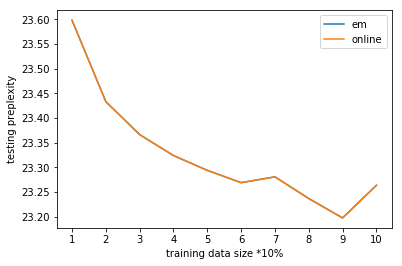

In [29]:
# graph test perplexity and training size

plt.plot(test_preplexity_batch, label = "batch")
plt.plot(test_preplexity_online, label = "online")
plt.xticks(np.arange(0, 10, 1), [str(i+1) for i in np.arange(0, 10, 1)])
plt.xlabel("training data size ")
plt.ylabel("testing preplexity")
plt.legend()
plt.show()

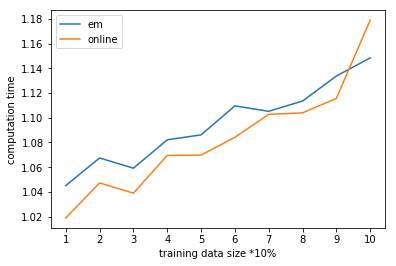

In [30]:
#graph training data size and computation time 

plt.plot(cTime_batch, label = "batch")
plt.plot(cTime_online, label = "online")
plt.xticks(np.arange(0, 10, 1), [str(i+1) for i in np.arange(0, 10, 1)])
plt.xlabel("training data size")
plt.ylabel("computation time")
plt.legend()
plt.show()

In [38]:
lda_batch = LDA(k=20, maxIter=10)

model_fit_batch = lda_batch.fit(title_df)

#show the topics top weighted terms 
model_fit_batch.describeTopics(5).show(truncate=False)

import numpy as np

terms = model_fit_batch.describeTopics(5)

row = terms.select("termIndices").rdd.map(lambda r: r[0]).collect()
for i in row:
    print(np.array(cv_fit.vocabulary)[i])

+-----+----------------------------+-------------------------------------------------------------------------------------------------------------------+
|topic|termIndices                 |termWeights                                                                                                        |
+-----+----------------------------+-------------------------------------------------------------------------------------------------------------------+
|0    |[1092, 791, 667, 619, 1258] |[8.082698377531445E-4, 7.951761463459716E-4, 7.77474735819759E-4, 7.734406817732263E-4, 7.732333026311401E-4]      |
|1    |[414, 339, 696, 1048, 1560] |[0.001066926593642263, 0.0010264624883490232, 7.985808427422882E-4, 7.779001600451283E-4, 7.756622057876716E-4]    |
|2    |[173, 1148, 893, 160, 264]  |[0.0017809910529800437, 0.001505732259152649, 0.0014529390569661235, 0.0013632172886726033, 0.0012963231117093753] |
|3    |[0, 2, 12, 13, 11]          |[0.03779554900589521, 0.01258055901720023, 0.0

In [37]:
lda_online = LDA(k=20, maxIter=10, optimizer='online', seed=1)

model_fit_online = lda_online.fit(title_df)

#show the topics top weighted terms 
model_fit_online.describeTopics(5).show(truncate=False)

import numpy as np

terms = model_fit_online.describeTopics(5)

row = terms.select("termIndices").rdd.map(lambda r: r[0]).collect()
for i in row:
    print(np.array(cv_fit.vocabulary)[i])

+-----+------------------------------+-------------------------------------------------------------------------------------------------------------------+
|topic|termIndices                   |termWeights                                                                                                        |
+-----+------------------------------+-------------------------------------------------------------------------------------------------------------------+
|0    |[0, 168, 59, 157, 78]         |[0.005042667172541153, 0.0044374932622852, 0.004184042072870195, 0.004074954195749545, 0.004034070598269336]       |
|1    |[614, 844, 577, 11, 253]      |[0.0029740489788689143, 0.0022489048283919253, 0.002180102274130638, 0.0021327046326462752, 0.0020232614757772945] |
|2    |[1571, 765, 1083, 756, 563]   |[0.0010934460251117567, 0.001090989331248809, 0.00107535737449527, 0.0010678272119579262, 9.929218869640102E-4]    |
|3    |[92, 86, 171, 3, 37]          |[0.004474713130326844, 0.0043751